# Detection of haricot bean species, using machine learning methods 

#### Student no : 21627868
#### Student name : Burak Yılmaz



## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

This assignment purposes are to try to find out how we can detect haricot bean species, using machine learning methods from the features created by digitizing the images of the various haricot beans. 

Primary purpose here is to cluster and classify the data
according to the types (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira).

In the first part we should show the data in separate clusters
using clustering methods. 

In the second part, after separating the dataset into training and test sets, we should classify the test dataset with a model trained with the training dataset.

## Data Understanding<a class="anchor" id="data_understanding"></a>

Importing all the libraries needed during the project

In [2]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import loguniform
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 



In [3]:
OD = pd.read_csv('data.csv')

In [4]:
OD.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


shape[0] gives the number of rows and equals to number of items

shape[1] gives the number of columns and equals to number of features

In [5]:
items , features = OD.shape

print("There are {} features".format(features))
print("There are {} items".format(items))

There are 17 features
There are 13611 items


Data types of the original data before any process.


In [6]:
dataTypeSeries = OD.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries.to_string())

Data type of each column of Dataframe :
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object


We can check smallest,largest and average values of data for each columns as well as other statistical values such as mean,std


In [7]:
OD.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


We can check the fields if any of them contains null value. Since there is no null value we don't have to deal with this problem.

In [8]:
OD.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Data Preparation<a class="anchor" id="data_preparation"></a>

In [9]:
#Let's see how many examples are there for each type of bean.

Seker = len(OD[OD['Class']=='SEKER'])
Barbunya = len(OD[OD['Class']=='BARBUNYA'])
Bombay = len(OD[OD['Class']=='BOMBAY'])
Cali = len(OD[OD['Class']=='CALI'])
Dermason = len(OD[OD['Class']=='DERMASON'])
Horoz = len(OD[OD['Class']=='HOROZ'])
Sira = len(OD[OD['Class']=='SIRA'])


print("There are {} Seker type of beans".format(Seker))
print("There are {} Barbunya type of beans".format(Barbunya))
print("There are {} Bombay type of beans".format(Bombay))
print("There are {} Cali type of beans".format(Cali))
print("There are {} Dermosan type of beans".format(Dermason))
print("There are {} Horoz type of beans".format(Horoz))
print("There are {} Sira type of beans".format(Sira))

There are 2027 Seker type of beans
There are 1322 Barbunya type of beans
There are 522 Bombay type of beans
There are 1630 Cali type of beans
There are 3546 Dermosan type of beans
There are 1928 Horoz type of beans
There are 2636 Sira type of beans


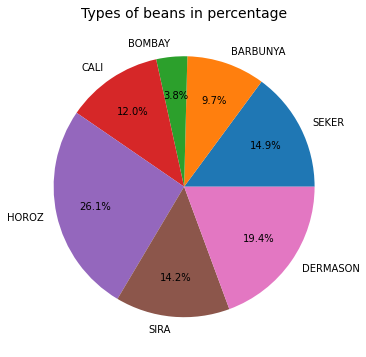

In [10]:
pie, ax = plt.subplots(figsize=[10,6])
labels = OD.keys()
plt.pie(x=[Seker,Barbunya,Bombay,Cali,Dermason,Horoz,Sira], autopct="%.1f%%",  labels=OD["Class"].unique(), pctdistance=0.7)
plt.title("Types of beans in percentage", fontsize=14);

I did label encoding for the target feature.

In [11]:
OD['Class'].replace({'SEKER': 0, 'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'DERMASON': 4, 'HOROZ': 5, 'SIRA': 6 }, inplace=True)
OD.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


New data types after label encoding.

In [12]:
dataTypeSeries = OD.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries.to_string())

Data type of each column of Dataframe :
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int64


When we look at the correlation map, most correlated features is marked with dark red and dark blue.Least correlated features marked with light blue(almost white). We will just keep one of the features and use it in machine learning algorithms, if any of the two features are high correlated.

In [13]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = OD.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000,0.967,0.932,0.952,0.242,0.267,1.000,0.985,0.054,-0.197,-0.358,-0.268,-0.848,-0.639,-0.272,-0.356,-0.203
Perimeter,0.967,1.000,0.977,0.913,0.385,0.391,0.968,0.991,-0.021,-0.304,-0.548,-0.407,-0.865,-0.768,-0.408,-0.429,-0.169
MajorAxisLength,0.932,0.977,1.000,0.826,0.550,0.542,0.933,0.962,-0.078,-0.284,-0.596,-0.568,-0.774,-0.859,-0.568,-0.483,-0.033
MinorAxisLength,0.952,0.913,0.826,1.000,-0.009,0.020,0.951,0.949,0.146,-0.156,-0.210,-0.015,-0.947,-0.471,-0.019,-0.264,-0.384
AspectRation,0.242,0.385,0.550,-0.009,1.000,0.924,0.243,0.304,-0.370,-0.268,-0.767,-0.988,0.025,-0.838,-0.979,-0.449,0.502
Eccentricity,0.267,0.391,0.542,0.020,0.924,1.000,0.269,0.319,-0.319,-0.298,-0.722,-0.970,0.020,-0.860,-0.981,-0.449,0.596
ConvexArea,1.000,0.968,0.933,0.951,0.243,0.269,1.000,0.985,0.053,-0.206,-0.362,-0.270,-0.848,-0.641,-0.274,-0.362,-0.203
EquivDiameter,0.985,0.991,0.962,0.949,0.304,0.319,0.985,1.000,0.028,-0.232,-0.436,-0.328,-0.893,-0.713,-0.330,-0.393,-0.200
Extent,0.054,-0.021,-0.078,0.146,-0.370,-0.319,0.053,0.028,1.000,0.191,0.344,0.354,-0.142,0.238,0.348,0.149,-0.224
Solidity,-0.197,-0.304,-0.284,-0.156,-0.268,-0.298,-0.206,-0.232,0.191,1.000,0.607,0.304,0.153,0.344,0.308,0.702,-0.030


In [14]:
# Create correlation matrix
corr_matrix = OD.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

OD=OD.drop(OD[to_drop], axis=1)

New correlation matrix after eliminating some of the features.

In [15]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = OD.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
Area,1.000,0.242,0.267,0.054,-0.197,-0.358,-0.848,-0.639,-0.356,-0.203
AspectRation,0.242,1.000,0.924,-0.370,-0.268,-0.767,0.025,-0.838,-0.449,0.502
Eccentricity,0.267,0.924,1.000,-0.319,-0.298,-0.722,0.020,-0.860,-0.449,0.596
Extent,0.054,-0.370,-0.319,1.000,0.191,0.344,-0.142,0.238,0.149,-0.224
Solidity,-0.197,-0.268,-0.298,0.191,1.000,0.607,0.153,0.344,0.702,-0.030
roundness,-0.358,-0.767,-0.722,0.344,0.607,1.000,0.230,0.783,0.472,-0.198
ShapeFactor1,-0.848,0.025,0.020,-0.142,0.153,0.230,1.000,0.469,0.249,0.428
ShapeFactor2,-0.639,-0.838,-0.860,0.238,0.344,0.783,0.469,1.000,0.530,-0.301
ShapeFactor4,-0.356,-0.449,-0.449,0.149,0.702,0.472,0.249,0.530,1.000,-0.193
Class,-0.203,0.502,0.596,-0.224,-0.030,-0.198,0.428,-0.301,-0.193,1.000


## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

Dropping the class feature since we do not need it while performing clustering.

In [16]:
data_cluster = OD.drop('Class',axis=1,)
data_cluster.head(5)


,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,28395,1.197191,0.549812,0.763923,0.988856,0.958027,0.007332,0.003147,0.998724
1,28734,1.097356,0.411785,0.783968,0.984986,0.887034,0.006979,0.003564,0.998430
2,29380,1.209713,0.562727,0.778113,0.989559,0.947849,0.007244,0.003048,0.999066
3,30008,1.153638,0.498616,0.782681,0.976696,0.903936,0.007017,0.003215,0.994199
4,30140,1.060798,0.333680,0.773098,0.990893,0.984877,0.006697,0.003665,0.999166


By using min-max scaler transform the data and save that data into a variable "ND"

In [17]:
scaler = MinMaxScaler()
ND = scaler.fit_transform(data_cluster)
ND = pd.DataFrame(data=ND,columns=data_cluster.columns)
ND

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,0.034053,0.122612,0.477797,0.671024,0.922824,0.934823,0.593432,0.833049,0.980620
1,0.035500,0.051577,0.278472,0.735504,0.871514,0.793138,0.547447,0.967316,0.974979
2,0.038259,0.131521,0.496448,0.716671,0.932141,0.914511,0.582016,0.800942,0.987196
3,0.040940,0.091623,0.403864,0.731365,0.761614,0.826871,0.552408,0.854744,0.893675
4,0.041504,0.025565,0.165680,0.700538,0.949832,0.988408,0.510741,1.000000,0.989116
...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.375584,0.788553,0.512286,0.942381,0.852151,0.531785,0.382135,0.974113
13607,0.092576,0.321303,0.746241,0.786890,0.947954,0.862952,0.509582,0.426233,0.970912
13608,0.092739,0.318558,0.743877,0.561689,0.936648,0.855785,0.508683,0.427019,0.943025
13609,0.092773,0.330472,0.753971,0.482741,0.908991,0.834795,0.514216,0.415330,0.913342


**Silhouette score** is  measure to decide the number of clusters to be formulated from the data.

+1 Score =  Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

0 Score = 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

-1 Score = 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.



Kmeans clustering and Silhoutte score for Original Data

In [24]:
kmeans = KMeans(n_clusters=7, init = "k-means++",random_state=77,max_iter=1000,n_init=100)
kmeans_predict=kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
score = metrics.silhouette_score(data_cluster, kmeans_predict)
print("Silhouette score is {} for 7 clusters".format( score))

Silhouette score is 0.5340072969302588 for 7 clusters


K-means clustering and Silhoutte score for Normalized Data

In [18]:
kmeans_normalized = KMeans(n_clusters=7, init="k-means++",random_state=77,max_iter=1000,n_init=100)
kmeans_normalized_predict=kmeans_normalized.fit_predict(ND)

centroids_ND = kmeans_normalized.cluster_centers_
score = metrics.silhouette_score(ND, kmeans_normalized_predict)
print("Silhouette score is {} for 7 clusters".format(score))

Silhouette score is 0.2855270085402677 for 7 clusters


I did some research on the internet and decided to use k-means algorithm for clustering because K-Means is useful when we have an idea of how many clusters actually exists in our space. Its main benefit is its speed. Below I try to explain the parameters that I used.

**random_state** --> This is setting a random seed. It is useful if we want to reproduce exact clusters over and over again. I set it to 77 as a random value.

**init** --> controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence.

**n_clusters** --> sets k for the clustering step. This is the most important parameter for k-means. I set it to 7 as it mentioned on assignment paper.

**n_init** --> sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. Increase this value to scan the entire feature space. That's why I used 100.

**max_iter** --> sets the number of maximum iterations for each initialization of the k-means algorithm. If we keep max_iter at a higher value, then we are guaranteed that we have explored the entire feature space. That's why I set it to 1000.

The K-means algorithm aims to choose centroids that minimise the **inertia**. Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. Based on the below calculations we can say that normalized data gave better results.

In [21]:
print ("Original dataset inertia: ", kmeans.inertia_)

Original dataset inertia:  301563263720.5506


In [22]:
print ("Normalized dataset inertia: ", kmeans_normalized.inertia_)

Normalized dataset inertia:  591.7146796396876


## Clustering results<a class="anchor" id="clustering"></a>

Here are the clustering result you can see below. For the convention and the size of the file I've listed four comparison. 

First graph represent the actual clusters. 

Second graph represents original data by using k-means algorithm without normalization by dropping the class feature from the original data. 

Third graph represents normalized data(using min-max scaling) by using k-means algorithm also dropping the class feature.

Black dots represent the centroids. It is basically at the center of a cluster.

From the inertia values we can say that normalized data gives better result as it can be seen below graphs.

Text(0.5, 1.0, 'KMeans Clustering with Normalized Data')

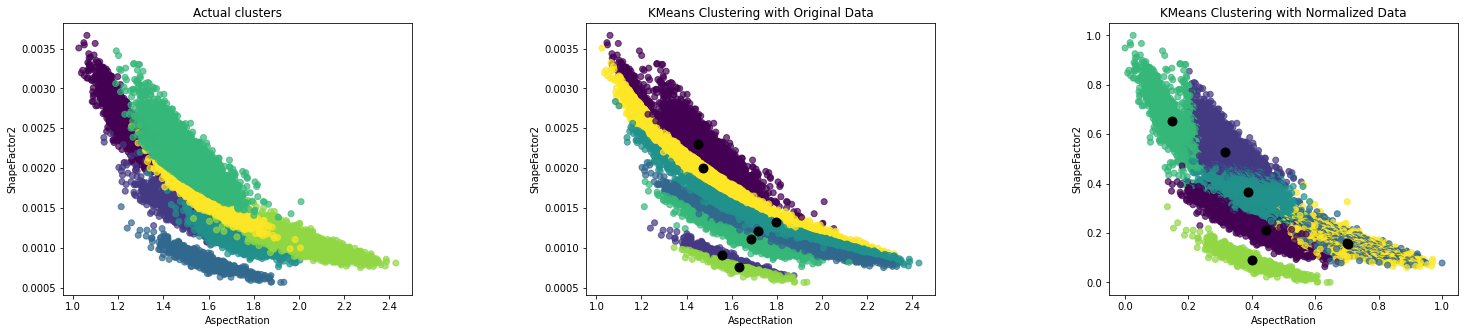

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
fig.subplots_adjust(wspace=0.5)

ax1.scatter(data_cluster['AspectRation'].values, data_cluster['ShapeFactor2'],  c=OD["Class"],alpha=0.7)
ax1.set(xlabel='AspectRation', ylabel='ShapeFactor2')
ax1.set_title("Actual clusters")

ax2.scatter(data_cluster['AspectRation'].values, data_cluster['ShapeFactor2'],c=kmeans_predict,alpha=0.7)
ax2.scatter(centroids[:,1] , centroids[:,7] , s = 80, color = 'k')
ax2.set(xlabel='AspectRation', ylabel='ShapeFactor2')
ax2.set_title("KMeans Clustering with Original Data")

ax3.scatter(ND['AspectRation'], ND['ShapeFactor2'],  c=kmeans_normalized_predict,alpha=0.7)
ax3.scatter(centroids_ND[:,1] , centroids_ND[:,7] , s = 80, color = 'k')
ax3.set(xlabel='AspectRation', ylabel='ShapeFactor2')
ax3.set_title("KMeans Clustering with Normalized Data")

Text(0.5, 1.0, 'KMeans Clustering with Normalized Data')

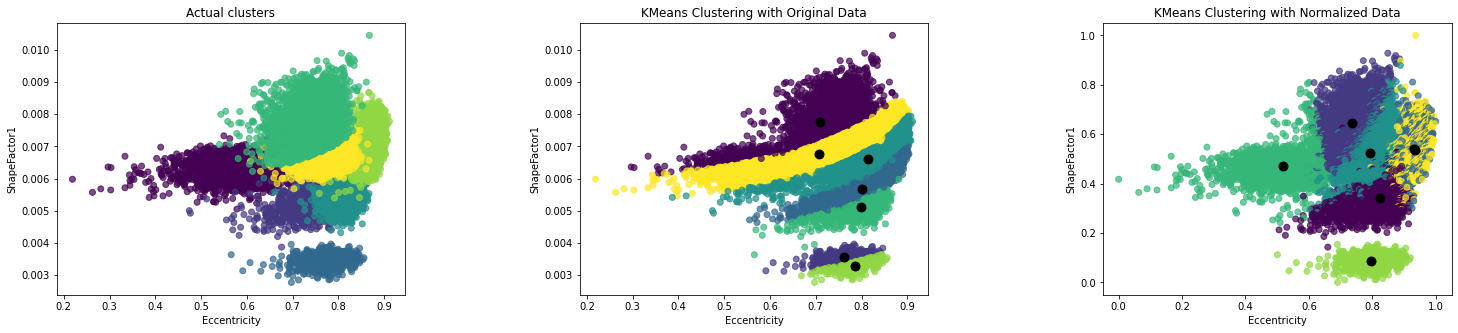

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
fig.subplots_adjust(wspace=0.5)

ax1.scatter(data_cluster['Eccentricity'], data_cluster['ShapeFactor1'], c=OD["Class"], alpha=0.7)
ax1.set(xlabel='Eccentricity', ylabel='ShapeFactor1')
ax1.set_title("Actual clusters")

ax2.scatter(data_cluster['Eccentricity'], data_cluster['ShapeFactor1'], c=kmeans_predict, alpha=0.7)
ax2.scatter(centroids[:,2] , centroids[:,6] , s = 80, color = 'k')
ax2.set(xlabel='Eccentricity', ylabel='ShapeFactor1')
ax2.set_title("KMeans Clustering with Original Data")

ax3.scatter(ND['Eccentricity'], ND['ShapeFactor1'], c=kmeans_normalized_predict, alpha=0.7)
ax3.scatter(centroids_ND[:,2] , centroids_ND[:,6] , s = 80, color = 'k')
ax3.set(xlabel='Eccentricity', ylabel='ShapeFactor1')
ax3.set_title("KMeans Clustering with Normalized Data")

Text(0.5, 1.0, 'KMeans Clustering with Normalized Data')

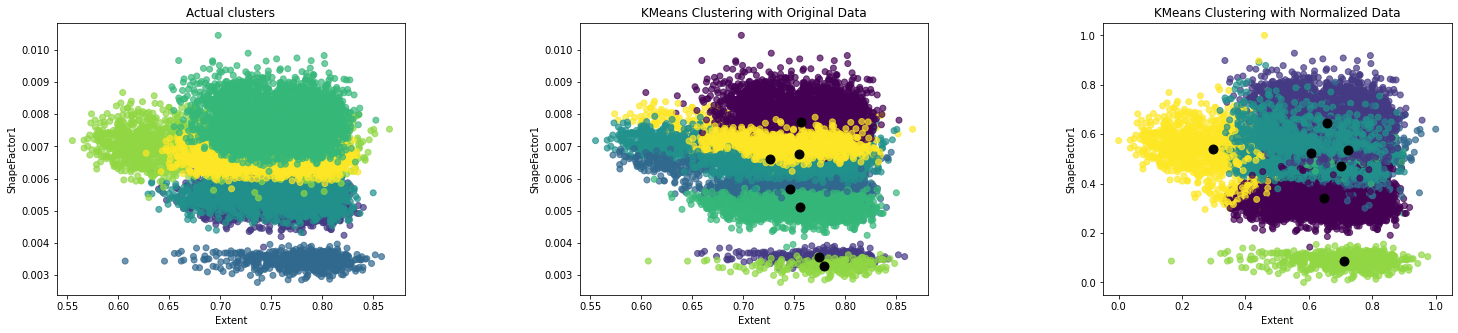

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
fig.subplots_adjust(wspace=0.5)

ax1.scatter(data_cluster['Extent'], data_cluster['ShapeFactor1'], c=OD["Class"], alpha=0.7)
ax1.set(xlabel='Extent', ylabel='ShapeFactor1')
ax1.set_title("Actual clusters")

ax2.scatter(data_cluster['Extent'], data_cluster['ShapeFactor1'], c=kmeans_predict, alpha=0.7)
ax2.scatter(centroids[:,3] , centroids[:,6] , s = 80, color = 'k')
ax2.set(xlabel='Extent', ylabel='ShapeFactor1')
ax2.set_title("KMeans Clustering with Original Data")

ax3.scatter(ND['Extent'], ND['ShapeFactor1'], c=kmeans_normalized_predict, alpha=0.7)
ax3.scatter(centroids_ND[:,3] , centroids_ND[:,6] , s = 80, color = 'k')
ax3.set(xlabel='Extent', ylabel='ShapeFactor1')
ax3.set_title("KMeans Clustering with Normalized Data")

Text(0.5, 1.0, 'KMeans Clustering with Normalized Data')

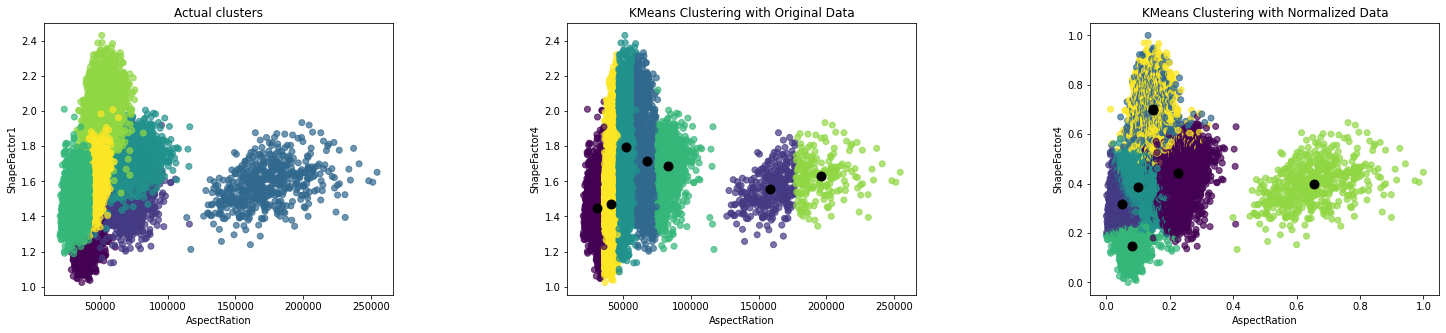

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
fig.subplots_adjust(wspace=0.5)

ax1.scatter(data_cluster['Area'], data_cluster['AspectRation'], c=OD["Class"], alpha=0.7)
ax1.set(xlabel='AspectRation', ylabel='ShapeFactor1')
ax1.set_title("Actual clusters")

ax2.scatter(data_cluster['Area'], data_cluster['AspectRation'], c=kmeans_predict, alpha=0.7)
ax2.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
ax2.set(xlabel='AspectRation', ylabel='ShapeFactor4')
ax2.set_title("KMeans Clustering with Original Data")

ax3.scatter(ND['Area'], ND['AspectRation'], c=kmeans_normalized_predict, alpha=0.7)
ax3.scatter(centroids_ND[:,0] , centroids_ND[:,1] , s = 80, color = 'k')
ax3.set(xlabel='AspectRation', ylabel='ShapeFactor4')
ax3.set_title("KMeans Clustering with Normalized Data")


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

**Original Data Train**

Split the features so that Y will be the target(types of beans) and X will be the other features.

In [28]:
X = OD.iloc[:, 0:9]
Y = OD.iloc[:, -1]

Splitting data to train dataset and test dataset.I used **strafied train-test split** so that split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. 

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify=Y)


By using random search we will try to find best parameters to use for our linear regression model.

I will try to explain the parameters that I used in random search.

**penalty**-->Used to specify the norm used in the penalization

**solver**-->Algorithm to use in the optimization problem.For small datasets, ‘liblinear’ is a good choice, For multiclass problems, ‘newton-cg’, ‘lbfgs’ can handle multinomial loss.

**n_jobs**-->Number of CPU cores used when parallelizing over classes.

**C**-->Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

I set n_iter to 10. Unlike the value of 10 higher values,such as 100, will give better results however it takes a lot of time to compute it. Due to those reasons i took value of 10.

I used **Repeated K-Fold Cross Validation** As the name depicts this method repeats Stratified K-Fold Cross validator n times with different randomisation in each repetition. Same as Stratified K-Fold entire data set is divided into k subsets. For each iteration it approximately maintains same percentage of samples of each target class.

For example below code code snippet for **Stratified 10-Fold Cross Validation** and gives 30 combinations i.e. n_splits * n_repeats.

Since our dataset is a multiclass dataset we will do random search based on the valid paramaters such as lbfgs,newton-cg (not liblinear).

In [30]:
#We ignore some warnings that is caused by slow cpu and inefficent memory.
warnings.filterwarnings('ignore')

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LogisticRegression()
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs']
space['penalty'] = ['none', 'l2']
space['C'] = loguniform(1e-5, 100)

# define search
search = RandomizedSearchCV(model, space, n_iter=5, n_jobs=-1, cv=cv,random_state=1)

# execute search
result = search.fit(X_train,Y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8753677877257423
Best Hyperparameters: {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}


In [31]:
model = LogisticRegression(multi_class='multinomial',C=result.best_params_['C'],penalty=result.best_params_['penalty'],solver=result.best_params_['solver'])
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.8784900808229243

**Normalized Data Train**

In [32]:
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [33]:
#We ignore some warnings that is caused by slow cpu and inefficent memory.
warnings.filterwarnings('ignore')

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_Normalized = LogisticRegression()
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs']
space['penalty'] = ['none', 'l2']
space['C'] = loguniform(1e-5, 100)

# define search
search = RandomizedSearchCV(model_Normalized, space, n_iter=5, n_jobs=-1, cv=cv,random_state=1)

# execute search
result = search.fit(X_train_normalized,Y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.923310393372225
Best Hyperparameters: {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}


In [34]:
model_Normalized = LogisticRegression(multi_class='multinomial',C=result.best_params_['C'],penalty=result.best_params_['penalty'],solver=result.best_params_['solver'])
model_Normalized.fit(X_train_normalized, Y_train)
model_Normalized.score(X_train_normalized, Y_train)

0.9236774430565761

Based on the research I did on the internet I decided to use Multinomial Logistic Regression model because of several reasons that could be find on following link. [Multinomial Logistic Regression](https://statistics.laerd.com/spss-tutorials/multinomial-logistic-regression-using-spss-statistics.php#:~:text=Multinomial%20logistic%20regression%20(often%20just,with%20more%20than%20two%20categories.) 

Multinomial logistic regression is a form of logistic regression used to predict a target variable have more than 2 classes.



## Evaluation<a class="anchor" id="evaluation"></a>

**Interpreting the Classification Report**

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive

The **recall** means "What percent of our predictions were correct"
Recall is the ability of a classifier to find all positive instances
Recall = TP/(TP+FN)

The **precision** will be "What percent of the positive cases did we catch". Precision is the ability of a classifier not to label an instance positive that is actually negative
Precision = TP/(TP + FP)

The **f1-score** means "What percent of our positive predictions were correct". The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

The **support** is the number of occurence of the given class in your dataset.

The **macro-average** precision and recall score is calculated as arithmetic mean of individual classes’ precision and recall scores.

The **macro-average** F1-score is calculated as arithmetic mean of individual classes’ F1-score.

**Original Data Evaluation**

In [35]:
predictions = model.predict(X_test)
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       406
           1       0.87      0.67      0.76       265
           2       1.00      1.00      1.00       104
           3       0.80      0.89      0.84       326
           4       0.91      0.89      0.90       709
           5       0.95      0.91      0.93       386
           6       0.81      0.89      0.84       527

    accuracy                           0.89      2723
   macro avg       0.90      0.89      0.89      2723
weighted avg       0.89      0.89      0.89      2723



We can also check in this way to see the accuracy of our model.

In [36]:
print("Accuracy with Original Data:", accuracy_score(Y_test, predictions))

Accuracy with Original Data: 0.8857877341167829


Below you can see the confusion matrix for original data. The diagonal elements represent the total correct values predicted per class.

Text(0.5, 1.0, 'Original Data Confusion Matrix')

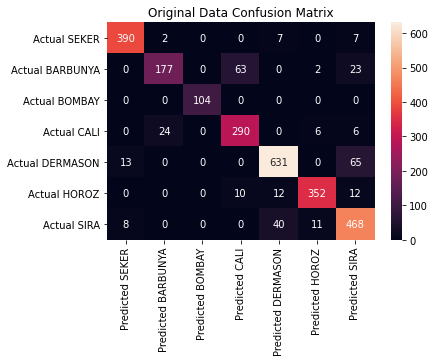

In [37]:
results = confusion_matrix(Y_test, predictions,normalize=None)
sns.heatmap(pd.DataFrame(results, columns=['Predicted SEKER', 'Predicted BARBUNYA','Predicted BOMBAY','Predicted CALI','Predicted DERMASON','Predicted HOROZ','Predicted SIRA']
                         , index=['Actual SEKER', 'Actual BARBUNYA','Actual BOMBAY','Actual CALI','Actual DERMASON','Actual HOROZ','Actual SIRA']), annot=True, fmt='d')
plt.yticks(rotation=0)
plt.title('Original Data Confusion Matrix')

**Normalized Data Evaulation**

In [38]:
predictions_Normalized = model_Normalized.predict(X_test_normalized)
print(classification_report(Y_test,predictions_Normalized))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       406
           1       0.94      0.92      0.93       265
           2       1.00      1.00      1.00       104
           3       0.94      0.94      0.94       326
           4       0.92      0.92      0.92       709
           5       0.96      0.95      0.96       386
           6       0.87      0.88      0.87       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [39]:
print("Accuracy with Normalized Data:", accuracy_score(Y_test, predictions_Normalized))

Accuracy with Normalized Data: 0.9294895336026442


Below you can see the confusion matrix for original data. The diagonal elements represent the total correct values predicted per class.

Text(0.5, 1.0, 'Normalized Data Confusion Matrix')

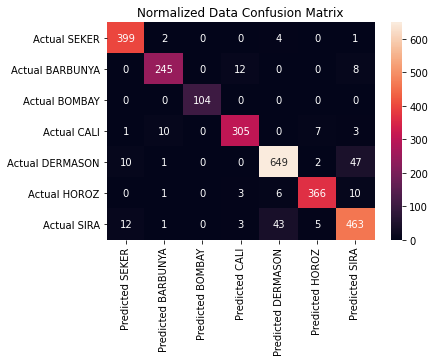

In [40]:
results = confusion_matrix(Y_test, predictions_Normalized)
sns.heatmap(pd.DataFrame(results, columns=['Predicted SEKER', 'Predicted BARBUNYA','Predicted BOMBAY','Predicted CALI','Predicted DERMASON','Predicted HOROZ','Predicted SIRA']
                         , index=['Actual SEKER', 'Actual BARBUNYA','Actual BOMBAY','Actual CALI','Actual DERMASON','Actual HOROZ','Actual SIRA']), annot=True, fmt='d')
plt.yticks(rotation=0)
plt.title('Normalized Data Confusion Matrix')

We can say that with normalized that our model worked better and we got more true predicted values as it can be seen above matrixes and classification reports.

## References<a class="anchor" id="references"></a>

[StackoverFlow-kmeans](https://stackoverflow.com/questions/22496689/when-to-use-k-means-clustering-algorithm/22497054#:~:text=K%2DMeans%20is%20useful%20when,of%20observations%20in%20your%20dataset.)

[Scikit-learn-kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[TowardsScience-kmeans](https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3)

[GeeksforGeeks-pieChart](https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/)

[Medium-silhoutte-score](https://medium.com/@jyotiyadav99111/selecting-optimal-number-of-clusters-in-kmeans-algorithm-silhouette-score-c0d9ebb11308)

[RandomizedSearch](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)

[RandomizedSearch2](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[Repeated Stratified KFold](https://medium.com/@venkatasujit272/overview-of-cross-validation-3785d5414ece)

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification Report](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

[Classification Report2](https://vitalflux.com/micro-average-macro-average-scoring-metrics-multi-class-classification-python/)

[Stratified Train-Test Splits](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/#:~:text=Stratified%20Train%2DTest%20Splits,-One%20final%20consideration&text=As%20such%2C%20it%20is%20desirable,a%20stratified%20train%2Dtest%20split.)

[Multinomial Logistic Regression](https://statistics.laerd.com/spss-tutorials/multinomial-logistic-regression-using-spss-statistics.php#:~:text=Multinomial%20logistic%20regression%20(often%20just,with%20more%20than%20two%20categories.)

[Multinomial Logistic Regression2](https://www.theanalysisfactor.com/logistic-regression-models-for-multinomial-and-ordinal-variables/)

[Multinomial Logistic Regression3](https://www.statisticssolutions.com/mlr/)

[Multinomial Logistic Regression4](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/)

[Confusion Matrix](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

[Label Encoding- Hot Encoding](https://pbpython.com/categorical-encoding.html)



**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>